In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import load_model

In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
path = r"C:\Users\user\My Python Stuff\Image Processing\Bean Disease\Bean_Dataset" # path to the data set

In [4]:
# Create an instance of ImageDataGenerator 
# Normalize pixel values to [0, 1]
# Specify the validation split if needed
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [5]:

# Load and preprocess the dataset using the ImageDataGenerator
dataset = datagen.flow_from_directory(
    path,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical',  # Set the class_mode to 'categorical' for one-hot encoding
    subset='training'  # Specify the subset as 'training' for training data
)


Found 792 images belonging to 3 classes.


In [6]:
# Load and preprocess the validation dataset (if applicable)
validation_dataset = datagen.flow_from_directory(
    path,
    target_size=(244, 244),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for validation data
)

Found 198 images belonging to 3 classes.


In [7]:
bean_classes = dataset.class_indices
bean_classes

{'angular_leaf_spot': 0, 'bean_rust': 1, 'healthy': 2}

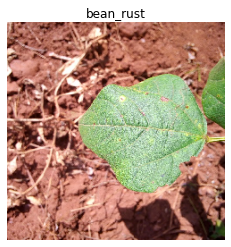

In [8]:
# Printing an image
images, labels = next(iter(dataset))
index = 8
image = images[index]
label = labels[index]
# Get the class name corresponding to the label
class_names = list(dataset.class_indices.keys())
class_name = class_names[label.argmax()]
plt.imshow(image) # display the image
plt.title(class_name)
plt.axis('off')  # remove the axis labels
plt.show()

In [9]:
base_model = MobileNetV2(include_top=False, input_shape=(244, 244, 3))

In [10]:
base_model.trainable = False

In [11]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
num_classes = 3
output = Dense(num_classes, activation='softmax')(x) 


In [12]:
model = Model(inputs=base_model.input, outputs=output)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 122, 122, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 122, 122, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 61, 61, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 63, 63, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 31, 31, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 31, 31, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 16, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 16, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 16, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 16, 16, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 16, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 16, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 16, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 16, 16, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 8, 8, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 8, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 8, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 8, 8, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [191]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [192]:
# Training the model
model.fit(dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/10
25/25 [==============================] - 58s 2s/step - loss: 0.6426 - accuracy: 0.7273 - val_loss: 0.4034 - val_accuracy: 0.8182
Epoch 2/10
25/25 [==============================] - 48s 2s/step - loss: 0.2694 - accuracy: 0.8965 - val_loss: 0.3285 - val_accuracy: 0.8586
Epoch 3/10
25/25 [==============================] - 44s 2s/step - loss: 0.1944 - accuracy: 0.9381 - val_loss: 0.2764 - val_accuracy: 0.8939
Epoch 4/10
25/25 [==============================] - 45s 2s/step - loss: 0.1239 - accuracy: 0.9646 - val_loss: 0.2159 - val_accuracy: 0.9343
Epoch 5/10
25/25 [==============================] - 42s 2s/step - loss: 0.0870 - accuracy: 0.9798 - val_loss: 0.1996 - val_accuracy: 0.9192
Epoch 6/10
25/25 [==============================] - 44s 2s/step - loss: 0.0622 - accuracy: 0.9899 - val_loss: 0.1942 - val_accuracy: 0.9293
Epoch 7/10
25/25 [==============================] - 44s 2s/step - loss: 0.0511 - accuracy: 0.9962 - val_loss: 0.2056 - val_accuracy: 0.9192
Epoch 8/10
25/25 [==